# GT vs Pred overlays (best / median / worst cases)

This notebook visualizes qualitative segmentation results from the trainde MONAI 2D U-Net pipeline:
- Show Ground Truth (GT) tumor mask vs Predicted tumor mask overlays

- Automatically display best, median, and worst cases per fold

Where the images come from
The overlays were already generated by your pipeline and saved in:

`outputs/unet2d_cv/overlays_ranked/fold_k/`

This provides an interpretable qualitative assessment, complementing quantitative metrics.

## 1. Library imports

In [9]:
from pathlib import Path
import re
from PIL import Image
import matplotlib.pyplot as plt

## 2. Project paths

This step automatically detects the project root and then builds paths realtive to it. This makes the notebook runnableon any machine as long as the folder structure is the same. 
  
Hardcoded `C:\Users\...` paths break reproducibility.  

In [10]:
# Project root (works if you run from project root OR from notebooks/)
PROJECT_ROOT = Path.cwd().resolve()
if not (PROJECT_ROOT / "outputs").exists() and (PROJECT_ROOT.parent / "outputs").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent

OUTPUTS_DIR = PROJECT_ROOT / "outputs"
OVERLAYS_RANKED_DIR = OUTPUTS_DIR / "unet2d_cv" / "overlays_ranked"

print("PROJECT_ROOT:", PROJECT_ROOT)
print("OUTPUTS_DIR:", OUTPUTS_DIR)
print("OVERLAYS_RANKED_DIR:", OVERLAYS_RANKED_DIR)

assert OVERLAYS_RANKED_DIR.exists(), f"Missing overlays_ranked folder: {OVERLAYS_RANKED_DIR}"


PROJECT_ROOT: C:\Users\Nurma\Desktop\thesis
OUTPUTS_DIR: C:\Users\Nurma\Desktop\thesis\outputs
OVERLAYS_RANKED_DIR: C:\Users\Nurma\Desktop\thesis\outputs\unet2d_cv\overlays_ranked


## 3. Selection of Best, Median, and Worst Cases per Fold

In [11]:
def parse_case_foldername(name: str):
    """
    Expected patterns:
      best_UCSF-PDGM-0533_nifti
      worst_UCSF-PDGM-0148_nifti
      median1_UCSF-PDGM-0453_nifti
    """
    m = re.match(r"^(best|worst|median\d+)_(.+)$", name)
    if not m:
        return None
    kind = m.group(1)
    patient_id = m.group(2)
    return kind, patient_id

fold_dirs = sorted(OVERLAYS_RANKED_DIR.glob("fold_*"))

for fold_dir in fold_dirs:
    print("\n" + fold_dir.name)
    case_dirs = [p for p in fold_dir.iterdir() if p.is_dir()]
    parsed = [parse_case_foldername(p.name) for p in case_dirs]
    parsed = [x for x in parsed if x is not None]
    for kind, pid in sorted(parsed):
        print(f"  {kind:8s} -> {pid}")



fold_0
  best     -> UCSF-PDGM-0533_nifti
  median1  -> UCSF-PDGM-0453_nifti
  median2  -> UCSF-PDGM-0107_nifti
  median3  -> UCSF-PDGM-0480_nifti
  worst    -> UCSF-PDGM-0148_nifti

fold_1
  best     -> UCSF-PDGM-0233_nifti
  median1  -> UCSF-PDGM-0382_nifti
  median2  -> UCSF-PDGM-0404_nifti
  median3  -> UCSF-PDGM-0282_nifti
  worst    -> UCSF-PDGM-0312_nifti

fold_2
  best     -> UCSF-PDGM-0372_nifti
  median1  -> UCSF-PDGM-0159_nifti
  median2  -> UCSF-PDGM-0056_nifti
  median3  -> UCSF-PDGM-0242_nifti
  worst    -> UCSF-PDGM-0491_nifti

fold_3
  best     -> UCSF-PDGM-0503_nifti
  median1  -> UCSF-PDGM-0317_nifti
  median2  -> UCSF-PDGM-0441_nifti
  median3  -> UCSF-PDGM-0053_nifti
  worst    -> UCSF-PDGM-0477_nifti

fold_4
  best     -> UCSF-PDGM-0380_nifti
  median1  -> UCSF-PDGM-0501_nifti
  median2  -> UCSF-PDGM-0169_nifti
  median3  -> UCSF-PDGM-0413_nifti
  worst    -> UCSF-PDGM-0447_nifti


## 4. Find and display the images 

This function finds overlay images in the case folder, and displays them in a row. Each case folder contains several images (usually PNGs). Additionally, it limits to max_images so the notebook stays readable

In [12]:
def list_images(case_dir: Path):
    imgs = []
    for ext in ("*.png", "*.jpg", "*.jpeg"):
        imgs.extend(sorted(case_dir.glob(ext)))
    return imgs

def show_case_folder(case_dir: Path, max_images: int = 6):
    imgs = list_images(case_dir)[:max_images]

    if not imgs:
        print(f"[WARN] No images found in: {case_dir}")
        return

    print(f"\nCase: {case_dir.name} | images shown: {len(imgs)}")

    n = len(imgs)
    plt.figure(figsize=(4 * n, 4))
    for i, img_path in enumerate(imgs, 1):
        img = Image.open(img_path)
        plt.subplot(1, n, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_path.name, fontsize=9)
    plt.show()

## 5. Visualize one fold (best + mdeian + worst)

This cell displays the ranked cases for a chosen fold:

- best case → show model success

- median cases → show typical performance

- worst case → show limitations and motivate future work

Showing fold: fold_0

Case: best_UCSF-PDGM-0533_nifti | images shown: 1


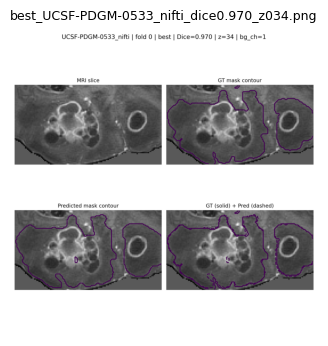


Case: median1_UCSF-PDGM-0453_nifti | images shown: 1


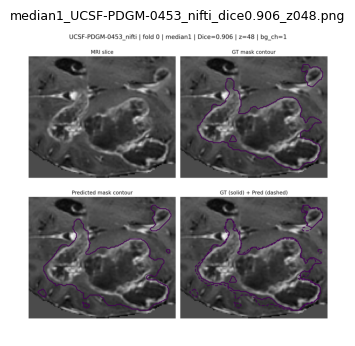


Case: median2_UCSF-PDGM-0107_nifti | images shown: 1


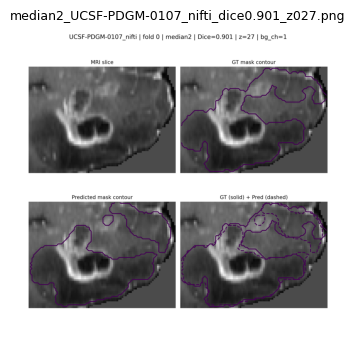


Case: median3_UCSF-PDGM-0480_nifti | images shown: 1


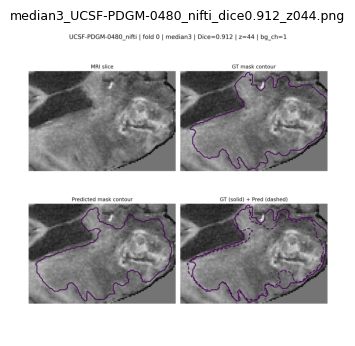


Case: worst_UCSF-PDGM-0148_nifti | images shown: 1


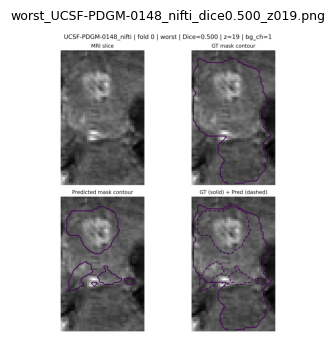

In [ ]:
FOLD_INDEX = 0 # adjust if you want to see a different fold

fold_dir = OVERLAYS_RANKED_DIR / f"fold_{FOLD_INDEX}"
assert fold_dir.exists(), f"Missing fold folder: {fold_dir}"

case_dirs = sorted([p for p in fold_dir.iterdir() if p.is_dir()])

print(f"Showing fold: fold_{FOLD_INDEX}")
for case_dir in case_dirs:
    show_case_folder(case_dir, max_images=6)
